In [3]:
#5.6 Affline / Softmaxレイヤの実装
#5.6.1 Affline

#おさらい
#3.3 多次元配列の計算
import numpy as np
A = np.array([1,2,3,4])
print(A)


[1 2 3 4]


In [2]:
np.ndim(A)

1

In [3]:
A.shape

(4,)

In [4]:
A.shape[0]

4

In [5]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [6]:
np.ndim(B)

2

In [7]:
B.shape

(3, 2)

In [8]:
A = np.array([[1,2],[3,4]])

In [9]:
A.shape

(2, 2)

In [10]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [11]:
np.dot(A, B)
\

array([[19, 22],
       [43, 50]])

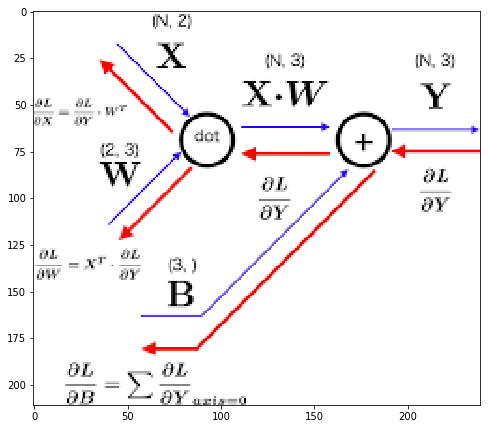

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod029.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

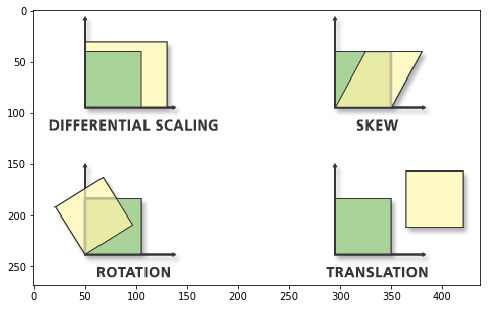

In [4]:
#因みにshapeはカタチづけるとか方向づける
#Affin空間
#こればかりはイメージで入ったほうが早い。
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod030.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [5]:
#図形を変換するって感じかな。
#専門的用語をかますと、幾何学の分野である図形を回転させたり引き延ばす変換処理の事をaffin変換という。
#平行移動、線形変換を組み合わせた変換の事。

#線形変換；変換の前に直線だった場所は、返還後も直線のまま保たれる、変換の事。直線が変換によって曲がる事もない。
#直線上に点A,B,Cが並んでいた時、変換の前後でAB:BCの比が変換しない。
#線の形が変わらないから線形変換

#Differential scaling：差動スケーリング
#skew：ゆがみ
#rotation：回転
#translation：置き換え

#2次元の図形だと、線形変換は元の座標に2x2の行列を掛ける事で表現可能
#平行移動は2次元のベクトルの加算で表現可能。
#x,yが元の座標、x',y'が返還後の座標。
#２ｘ２の行列が線形変換でtx,tyが平行移動

#(x')=(a b)(x)   (tx)
#(y')=(c d)(y) + (ty)

#次元を1つ上げた3次元の座標（同次座標と呼ぶ）を導入すると、上記を1つの行列の乗算にまとめてしまう事が可能。
#これを同次変換という

#(x')=(a b tx)(x)
#(y')=(c d ty)(y)
#(1) =(0 0  1)(1)

#これが座標変換であり、例えばUnityとかで座標があってx,y,z軸があって、その0を基準に±で考えるよね。
#つまり、初めて聞いたような言葉であっても知らないうちに使っている場合があるのであーる。

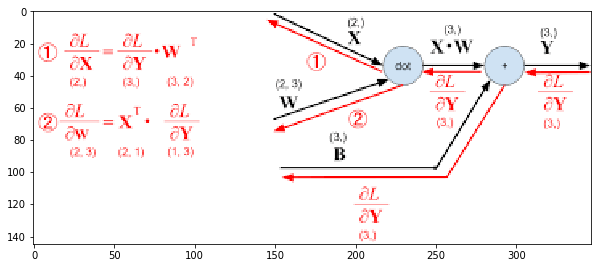

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod031.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

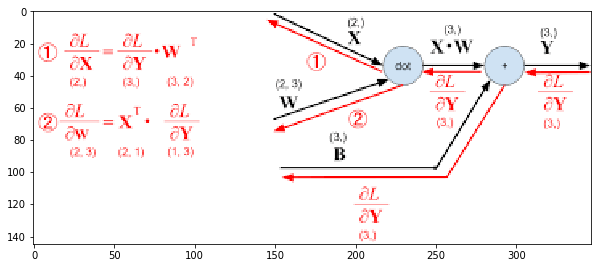

In [4]:
#上記は既に完成形の図だからややこしいけれど、Affineレイヤーの計算式
#行列の積を計算するノードを[dot]として表すことにすると、np.dot(X ,W) + Bの計算は上記で表せる。
#(N, 2)X
#(2, 3)W
#(3,  )B
#これまで見て来た計算グラフはスカラ値（「スカラーとは、配列とかと異なり、より小さな部分に'分割する'ことが できない値のことです。」）
#がノード間で流れていたが、今回は行列がノード間を伝播することになる。

#逆伝播の考え方も行列の要素ごとに書き、同手順で計算することが可能
#∂L/∂X = ∂L/∂Y・W^T ※Tは転置を表す。W(i,j)→W(j,i)の要素に入れ替える事を言う。
#                          (W11 W21)
#W = (W11 W12 W13) → W^T  (W12 W22)
#    (W21 W22 W23)         (W13 W23)

#∂L/∂X = ∂L/∂Y・W^T
# (2,)     =  (3,) ・(3,2)

#∂L/∂W = X^T・∂L/∂Y
#(2,3) = (2,1)・(1,3,)

#X = ∂L/∂X　は同形状
#W = ∂L/∂W  も同形状

#X       = (x0,x1,…xn)
#∂L/∂X = (∂L/∂x0,∂L/∂x1,…,∂L/∂xn)
#上記の数式も同じとなる

#行列の積は対応する次元の要素数を一致させる必要があり、その一致を確認する事で、数式
#∂L/∂X = ∂L/∂Y・W^T
# (2,)     =  (3,) ・(3,2)
#を導き出せる。
#例) ∂L/∂Y  (3,) W(2,3)の時、∂L/∂Xの形状が(2,)になるように　∂L/∂Y　と　W　の積を考える
#そうすると
#∂L/∂Y・W^T = ∂L/∂X
# (3,)　 (3,2)   (2,)

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod031.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

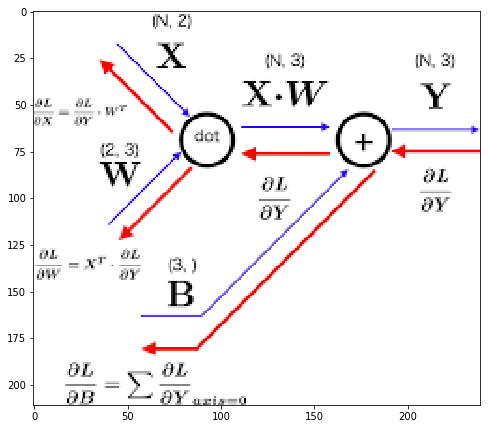

In [2]:
#①∂L/∂Y・W^T = ∂L/∂X　のように計算グラフを見て導き出せるようになる。
# 　(3,)　 (3,2)   　(2,)

#5.6.2　バッチ版affineレイヤー
#これまで説明してきたものは1つのデータを運ぶことしか出来なかったが、纏めて伝播する。つまりパッチする。
#上記の図と変更となったのは、Xの部分が(N,2)になった事。

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod032.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [4]:
#バイアス加算（B)に関しては、X・Wに対して、それぞれのデータに加算される。
#N=2だったとしたとき、バイアスはその2個のデータそれぞれに対して加算される。

X__dot__W = np.array([[0,0,0],[10,10,10]])
B = np.array([1, 2, 3])

In [5]:
X__dot__W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [6]:
X__dot__W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [7]:
#順伝播のバイアスの加算は、それぞれのデータ（1,2個目のデータ…）に対して、加算される。
#その為、逆伝播の際にはバイアスの要素に集約される必要がある。

dy = np.array([[1,2,3],[4,5,6]])
dy

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
dB = np.sum(dy, axis=0)
dB

array([5, 7, 9])

In [10]:
#この例ではデータが2個あるとして、その2個のデータに対しての微分をデータごとに合算して求めている。
#その為、np.sum()で、0番目の軸（データを単位とした軸）に対して（axis(軸って意味)=0)の総和を求めるのです。
#以上から、Affineの実装

class Affine:
    def __init__(self,W,b):
        self.W = w
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

        def forwad(self, x):
            self.x = x
            out = np.dot(x.self.W) + self.b

        def backword(self, dout):
            dx = np.dot(dout, self.W.T)
            self.dW = np.dot(self.x.T, dout)
            self.db = np.sum(dout,axis=0)

            return dx


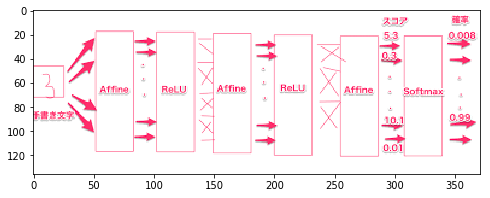

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

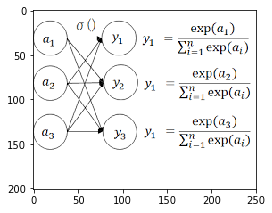

In [15]:
#softmax-with-lossレイヤー
#出力層であるソフトマックス関数について
#ソフトマックス関数は入力された値を正規化してくれる。復習になりますが…？？？復習？？？
#やってまえしたね…351で…・。

#おさらい
#3_5出力層の設計
#ニューラルネットワークは分類と回帰問題の両方に用いる。そのどちらかの出力層に対して活性化関数を使い分ける
#回帰問題は恒等関数、分類問題はソフトマックス関数を使う

#3_5_1 ソフトマックス関数
#              n
#yk = exp(ak)/∑ exp(ai)
#             i=1
#上記のように表す
#分子が入力信号akの指数関数
#分母が入力信号全総和となっている

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod034.png')
plt.figure(figsize=(4, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [16]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) #指数関数
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [17]:
sum_exp_a = np.sum(exp_a) #指数関数総和
print(sum_exp_a)

74.1221542101633


In [18]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [19]:
#これが基本で注意点は指数関数がオーバーフローを起こしてしまう点ということだが、簡単に言うと小数がどっかんどっかん
#出てくるから、それが処理できないんじゃって事になるので、それを抑える工夫をしましょうって感じになっていたのが
#おさらい

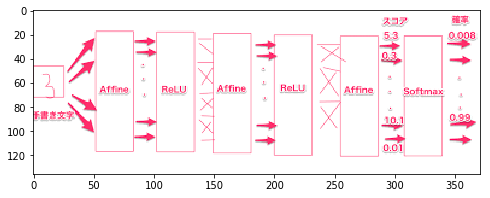

In [20]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

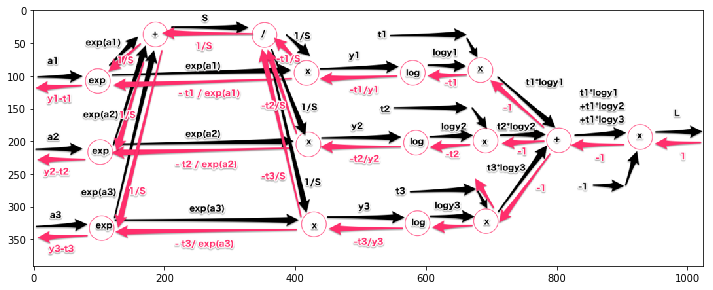

In [27]:
#その上で上記。簡単に言うと10個のバラバラの数値でも、それを％化してくれて「１」に収めてくれる。
#その為、どれが一番データとして正しいのかを比率してわかる。

#ニューラルネットワークでは推論、学習のフェーズで分かれている。
#通常ニューラルネットワークの推論でSoftmax関数を使う事はないけれど、推論を行う時は最後のAffineレイヤにて出力
#を認識結果として用いる。
#ニューラルネットワークが正しく正規化しない出力結果（上記だと300辺りのAffinレイヤーの結果）をスコアと呼ぶ事がある。
#ニューラルネットワークの学習時にはSoftmaxレイヤを必要とするけれど、スコアが高い時点でこれでいいってなるため、
#最後のSoftmax関数はいらなくてもいいんじゃね？っていう推論。

#Softmaxレイヤーとエントロピー誤差を含めてレイヤー実装を行う。グラフは下記。

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod035.png')
plt.figure(figsize=(12, 14)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

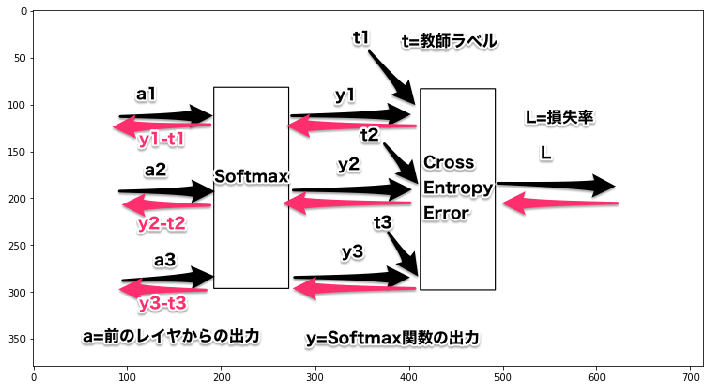

In [28]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod036.png')
plt.figure(figsize=(12, 14)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [29]:
#もう少しわかりやすくしたのが上記。
#ややこしいため、ふろくがついている程だ。
#クラス分類を行う場合を想定。
#前レイヤから3つの入力（スコア）を受け取るものとする。
#Softmaxレイヤは入力の(a1,a2,a3)を正規化して(y1,y2,y3)を出力する。
#Cross Entropy Errorレイヤは、Softmaxレイヤの出力(y1,y2,y3)と、教師ラベルの(t1,t2,t3)を受け取り、
#それらのデータから損失Lを出力させる。

#こうすると逆伝播の結果が(y1-t1,y2-t2,y3-t3)と綺麗に返ってくる。
#Softmaxレイヤ出力(y1,y2,y3)は教師データの(t1,t2,t3)なので、(y1-t1,y2-t2,y3-t3)は
#Softmaxレイヤの出力と教師ラベルの差分となる。
#ニューラルネットワークの逆伝播ではこの差分である誤差が前レイヤへ伝わっていく。

#当初の目的：
#ニューラルネットワークの学習目的は、ニューラルネットワークの出力（Softmaxの出力）を教師ラベルに近づけるように
#重みを調整する事が目的。その為にニューラルネットワークの出力と教師ラベルとの誤差を効率よく前レイヤに伝える
#事が必要だった。結果として(y1-t1,y2-t2,y3-t3)はSoftmaxレイヤの出力と教師ラベルの差であり、現在の
#ニューラルネットワークの出力と教師ラベルの誤差を素直に表している。

#「Softmax関数」の損失関数をして「交差エントロピー誤差」を用いると(y1-t1,y2-t2,y3-t3)という綺麗な結果になる。
#綺麗な結果になる。これは「交差エントロピー誤差」がその為に設計されているものだからである。
#回帰問題では、出力層に損失関数として「2乗和誤差」を用いるが、これも同様にあたる。
#つまり、恒等関数の損失関数として「2乗和誤差：を用いても、逆伝播は(y1-t1,y2-t2,y3-t3)という綺麗な結果になる。

#例
#教師ラベル（0,1,0)であるデータに対して、Softmaxレイヤの出力が（0.3,0.2,0.5)の時。
#正解ラベルに対する確率は0.2となる。つまり、正しくない。
#この場合、Softmaxレイヤからの逆伝播は(0.3,-0.8,0.5)という大きな誤差を伝播することになる。
#この誤差が前レイヤ―に逆伝播するものだから、最終的に大きな誤差を学習してしまう。

#別例
#教師ラベル（0,1,0)であるデータに対して、Softmaxレイヤの出力が（0.01,0.99,0.0)の時。
#この場合、Softmaxレイヤからの逆伝播は(0.01,-0.01,0.0)と誤差が小さくなる。

#では…？Softmax-with-Lossレイヤ実装を行う。

In [30]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None  #損失
        self.y = None     #softmax出力
        self.t = None    #教師データ（one-hot vector)

    def forward(self,x,t):
        self.t = t
        self.y = softmax(x)
        self.t = cross_entropy_error(self.y,self.t)

        return self.loss

    def backward(self,dout=1):
        batch_size = self.shape[0]
        dx = (self.y -self.t) / batch_size

        return dx

In [1]:
#上記実装は424のバッチ対応版交差エントロピー誤差の実装
#352：ソフトマックス関数の実装上の注意
#双方の関数を使っている為簡単に済ませる…って事は持ってこないと駄目なのね…。
#逆伝播の場合、バッチ個数（batch_size)で割る事で、データ1戸当たりの誤差が前レイヤへ伝播する点に注意する

#5_7誤差逆伝播法の実装
#5_7_1：ニューラルネットワークの学習の全体図
#前提：
#ニューラルネットワークは適応可能な重み、バイアスがある.この重み、バイアスを訓練データに適応する事で調整する
#これを「学習」という
#1：ミニバッチ
#訓練データの中からランダムに一部のデータを選ぶ
#2：勾配算出
#各重みパラメータに関する損失関数の勾配を求める
#3：パラメータ更新
#重みパラメータを勾配方向に微笑量だけ更新する
#4：繰り返す
#１に戻る。

#そして、今回連鎖律を行っていたのはその勾配算出を行う為微分を利用していたけれど、その計算を速める為。
#つまり、目的地が見えてしまえばゴールへの戦略も早いって事。

In [2]:
#572:TwoLayerNet
#２層のニューラルネットワークを実装する
#実装の中身は前章、4.5：学習アルゴリズムの実装と」と共通する部分が多くある
#レイヤーを使用することで認識結果を得る処理(oredict())や勾配を求める処理(gradient())
#がレイヤの伝播だけで達成できる
#gradient：勾配
#predict：予測

#表5-1：TwoLayerNotクラスのインすんす変数
#params：ニューラルネットワークのパラメータを保持するディレクショナリ変数。
#        params['W1']は1個目の重み,params['b1']は1層目のバイアス
#        params['W2']は2個目の重み,params['b2']は2層目のバイアス

#layers：ニューラルネットワークのレイヤーを保持する順番付きディレクショナリ変数。
#        layers['Affine1'],layers['Relu1'],layers['Affine2']といったように
#        順番付きディレクショナリで各レイヤを保持する

#lastlayer：ニューラルネットワーク最後のレイヤー
#        　この例では、SoftmaxWithLossレイヤー。

#表5-2：TwoLayerNotクラスのメソッド
#__init__(self,input__size,hidden_size,output_size,weidht_init_std):
#初期化を行う。
#引数は頭から順に、入力層のニューロンの数、隠れ層のニューロンの数、
#出力層のニューロンの数、重み初期化時のガウス分布のスケール
#predict(self,x):認識（推論）を行う。引数のxは画像データ
#loss(self,x,t)：損失関数の値を求める
#accuraacy(self,x,t):認識精度を求める
#numerical_gradient(self, x, t)：重みパラメータに対する勾配を数値微分に
#よって求める(前章と同じく)
#gradient(self,x,t)：重みパラメータに対する勾配を誤差逆伝播法によって求める

In [1]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size,hidden__size, output_size,weight__init__std=0.01)
#重み生成
    self.params=()
    self.params['W1'] = weight__init__std * np.random.randn(input__size,hidden__size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight__init__std * np.random.randn(input__size,output__size)
    self.params['b1'] = np.zeros(output_size)

#レイヤ生成
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
    self.lastLayer = SoftmaxEithLoss()

sef predict(self, x):
    for layer in self.layersvalues():
        x = layer.forward(x)

    return x

# x:入力データ,t:教師データ
def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)

def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(Y == t) / float(x.shape[0])
    return accuracy

def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x ,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

def gradient(self, x, t):
    #forward
    self.loss(x, t)

    #backward
    dout = 1
    dout = self.lastlayer.backward(dout)

    layers = list(self.layers.value())
    layers.reverse()
    for layer in Layers:
        dout = layer.backward(dout)

    #設定
    grads = ()
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
 
    return grads

SyntaxError: invalid syntax (<ipython-input-1-3dd1e47b012b>, line 9)

In [2]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden__size, output_size, weight_init_std = 0.01)
#重み生成
    self.params=()
    self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(input_size,output_size)
    self.params['b1'] = np.zeros(output_size)

#レイヤ生成
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
    self.lastLayer = SoftmaxEithLoss()

sef predict(self, x):
    for layer in self.layersvalues():
        x = layer.forward(x)

    return x

# x:入力データ,t:教師データ
def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)

def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(Y == t) / float(x.shape[0])
    return accuracy

def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x ,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

def gradient(self, x, t):
    #forward
    self.loss(x, t)

    #backward
    dout = 1
    dout = self.lastlayer.backward(dout)

    layers = list(self.layers.value())
    layers.reverse()
    for layer in Layers:
        dout = layer.backward(dout)

    #設定
    grads = ()
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
 
    return grads

SyntaxError: invalid syntax (<ipython-input-2-3997b770087b>, line 9)

In [3]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden__size, output_size, weight_init_std = 0.01):
#重み生成
    self.params=()
    self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(input_size,output_size)
    self.params['b1'] = np.zeros(output_size)

#レイヤ生成
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
    self.lastLayer = SoftmaxEithLoss()

sef predict(self, x):
    for layer in self.layersvalues():
        x = layer.forward(x)

    return x

# x:入力データ,t:教師データ
def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)

def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(Y == t) / float(x.shape[0])
    return accuracy

def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x ,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

def gradient(self, x, t):
    #forward
    self.loss(x, t)

    #backward
    dout = 1
    dout = self.lastlayer.backward(dout)

    layers = list(self.layers.value())
    layers.reverse()
    for layer in Layers:
        dout = layer.backward(dout)

    #設定
    grads = ()
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
 
    return grads

IndentationError: expected an indented block (<ipython-input-3-ecd32cdb99ed>, line 11)

In [4]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden__size, output_size, weight_init_std = 0.01):
#重み生成
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(input_size,output_size)
    self.params['b1'] = np.zeros(output_size)

#レイヤ生成
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
    self.lastLayer = SoftmaxEithLoss()

sef predict(self, x):
    for layer in self.layersvalues():
        x = layer.forward(x)

    return x

# x:入力データ,t:教師データ
def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)

def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(Y == t) / float(x.shape[0])
    return accuracy

def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x ,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

def gradient(self, x, t):
    #forward
    self.loss(x, t)

    #backward
    dout = 1
    dout = self.lastlayer.backward(dout)

    layers = list(self.layers.value())
    layers.reverse()
    for layer in Layers:
        dout = layer.backward(dout)

    #設定
    grads = ()
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
 
    return grads

IndentationError: expected an indented block (<ipython-input-4-49a2624f4d9e>, line 11)

In [5]:
#インデントブロックが必要(インデントがずれている)

import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden__size, output_size, weight_init_std = 0.01):
#重み生成
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(input_size,output_size)
        self.params['b1'] = np.zeros(output_size)

#レイヤ生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
        self.lastLayer = SoftmaxEithLoss()

    def predict(self, x): #予測
        for layer in self.layersvalues():
            x = layer.forward(x)

        return x

# x:入力データ,t:教師データ
    def loss(self, x, t): #損失関数
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t): #正確さ
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(Y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t): #微分
        loss_W = lambda W: self.loss(x ,t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t): #勾配
        #forward
        self.loss(x, t)

        #backward
        dout = 1
        dout = self.lastlayer.backward(dout)

        layers = list(self.layers.value())
        layers.reverse()
        for layer in Layers:
            dout = layer.backward(dout)

        #設定
        grads = ()
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

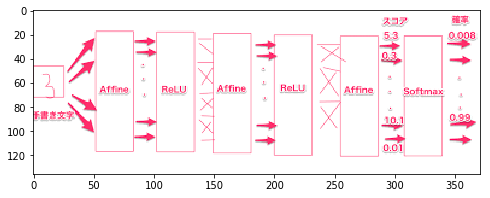

In [7]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [8]:
#レイヤ生成
#        self.layers = OrderedDict()
#        self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
#        self.layers['Relu1'] = Relu()
#        self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
#        self.lastLayer = SoftmaxEithLoss()

#上記プログラムと上記図を照らし合わせると、レイヤ順に並んでいる事がわかる
#これはOrderedDictionary クラス
#メモ : このクラスは、.NET Framework version 2.0 で新しく追加されたものです。
#キーとインデックスに基づいて並べ替えられた、キー/値ペアのコレクションを表します。

#つまりキー、値ペアを順番付きで覚える事が出来るという意味。
#後は今まで勉強してきたことの集大成を順伝播と逆伝播をして誤差逆伝播法として完成させて
#いるのが、このプログラム。

#層（レイヤー）を作って、組み立てて、流して、戻す。それを繰り返してくれる。
#だから、ニューラルネットワークが絶大に学習してくれる。
#そして、元の数値が正しいのかも確認してくれる。

#573:誤差逆伝播法の勾配確認
#これまでの勾配まとめ
#・数値微分
#・解析的に数式をといて求める方法（誤差逆伝播法）←大量パラメータがあって
#も効率的に計算可能。numpyだね（多次元配列）。

#じゃあなんで数値微分なんかやったの？って話になると、正しさを確認するため。
#誤差逆伝播法は効率的に計算できるけれど、レイヤーを何回もまたぐから複雑さが増してしまう。
#その為に、確認って意味で時間はかかるけれど2つの計算式を使って誤差を確認する。
#また数値微分は実装も簡単なのでミスも起こりにくい（実際はプログラムだし一度
#保存してしまえばデータが消えない限りってのはあるけれど)

#上記の誤差確認を勾配確認(gradient check)という。勿論目視ではなくこれもpythonで行う。

In [9]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

#データ読み込み
(x_tain, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label =True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

#各重みの絶対誤差の平均
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

NameError: name 'x_train' is not defined

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

#データ読み込み
(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label =True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

#各重みの絶対誤差の平均
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:1.9212421725030137e-10
b1:9.684808990368413e-10
W2:7.21616052104801e-08
b2:1.4354062226884511e-07


In [11]:
#使っているのはMnist_dataset
#訓練データの一部を使って数値微分で求めた勾配と誤差逆伝播法で求めた勾配誤差を確認している
#最後に書いてある各重みパラメータの要素の差の絶対値(※1)を求めて、その平均を算出。

#W1:1.9212421725030137e-10　= 	0.00000000019212421725030137
#b1:9.684808990368413e-10 =  0.0000000009684808990368413
#W2:7.21616052104801e-08 = 0.0000000721616052104801
#b2:1.4354062226884511e-07 = 	0.00000014354062226884511

#※1絶対値とは、【数直線上のある点と原点との距離】を表しています。
#従って、その値は、必ず、正の値になります。
#（ 負の値の距離なんてありませんよね・・！）
#だから、-3という数は負ですが、-3という点と原点との距離を表す

#e-10とか。これ指数表記。滅茶苦茶小さい数を0.00000とか今ならパソコンで一発どーんだけれど
#昔は書いてらんねーって感じで、こんな表記…ってイメージ。
#で、実際のアラビア数字だと↑に書いている。その分0をつければいいだけ。
#数値微分で出した答えと、誤差逆伝播法で出した答えの差が0.0000000…だけ離れてるってちっさ！
#つまり誤差少ないから正解じゃね？って意味。

#ちな、0になる事はほぼない。
#これはPCの32bit計算に起因するんだって。

In [12]:
#574：誤差逆伝播法学習(#45学習アルゴリズムの実装を行っている(P113))


import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import  TwoLayerNet

#データ読み込み（36：手書き学習より）
(x_train,t_train),(x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)
#trainはtrainingだね。訓練を行うって事。

#572(誤差逆伝播法に対応したニューラルネットワーク実装より)
#451(2層ニューラルネットワークのクラスより(P113))
network = TwoLayerNet(input_size=784, hidden_size = 50, output_size = 10)

#441(勾配法(ハイパーパラメータより(P109)))
#441(勾配法(学習率より(P108)))
iters_num = 10000 #iter:プロセス
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

#(363バッチ処理(P78),ミニバッチ学習（P91))※訓練データから数枚取り出す
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #誤差逆伝播法によって勾配を求める
    grad = network.gradient(x_batch, t_batch)

    #更新
    for key in ('W1', 'W2', 'b1', 'b2'):
        network.params[key] -= learning_rate * grad[key]

#(42損失関数より(P87))
#452(ミニバッチ学習の実装より(P117))
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

#(453:テストデータで評価より（P120））
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_tain, t_train)
        test_acc =network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.10441666666666667 0.1028
0.77775 0.7844
0.8708166666666667 0.8727
0.89735 0.8991
0.9076833333333333 0.9111
0.9142333333333333 0.9158
0.91865 0.9202
0.9236666666666666 0.9274
0.9272333333333334 0.9293
0.9312333333333334 0.9327
0.9346666666666666 0.9358
0.93665 0.9377
0.9393166666666667 0.9376
0.9414833333333333 0.9408
0.94355 0.944
0.94515 0.9437
0.9464 0.9458


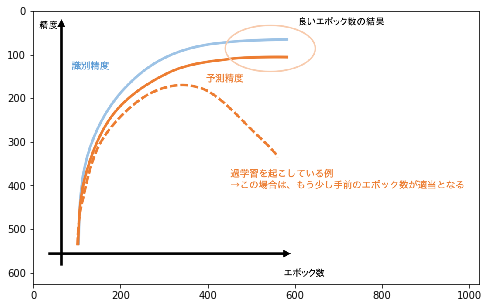

In [13]:
#epochとは
#エポック数とは、「一つの訓練データを何回繰り返して学習させるか」の数のことです。
#Deep Learningのようにパラメータの数が多いものになると、
#訓練データを何回も繰り返して学習させないとパラメータをうまく学習できないません
#(逆にやりすぎると過学習を起こすわけなんですが)。
#多すぎずに少なすぎないエポック数を指定することによって、
#パラメーターをうまく学習させることができます。

#どうなっていると「良い」エポック数なのか
#学習の最終的な目標は、「汎化性能があるパラメータ集合を見つけること」です。
#そのため、訓練データへの精度が高く、且つ予測精度が高くなるように学習させてやることが
#重要です。

#よって、過学習を起こさずに、かつ訓練精度と予測精度が共に良いような、
#そんなエポック数を見つけることができれば(以下の図参照)、良いエポック数ということになります

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod037.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [14]:
#適当なエポック数で止める
#ということで、上のような状況が良いとわかっているのであれば、
#学習がある程度進んだ段階で学習を打ち切る「Early Stopping」というものがあります。

#これは、簡単に言うと、「学習が進んで精度の向上がこれ以上見込めないとなったら、
#そこで学習を止める」という方法です。
#学習時に「訓練用のデータ」と「学習を止めるかということを判断するバリデーション用のデータ」
#に分けておき、そのデータを用いて学習を止めるかどうかという判定をします。

#詳しくは以下の文献にゆずりますが、kerasなどではコールバック関数に指定して
#学習をさせるだけで、その処理を実現することが出来ます。簡単ですね。

#データ数やパラメーターが多くなってくると学習に時間がかかりますし、
#モデルを探索している途中などでは、ある程度まで行ったら学習を止めて次のやつを
#試したいみたいなことをあるので、これはすごく便利です。

In [15]:
#58：纏め
#・計算グラフにより計算過程を資格的に把握できる
#・計算グラフノードには局所的な計算によって構成.
#その局所的な関数によって全体的な計算を把握。
#・ニューラルネットワークの構成要素をレイヤーとして実装する事で、
#勾配の計算を効率的に求める事が可能。
#・数値微分と誤差逆伝播法の結果を比較する事で、誤差逆伝播法の実装に誤りがないことを確認。

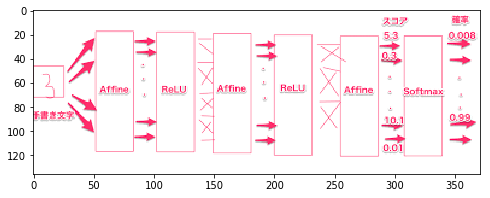

In [16]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

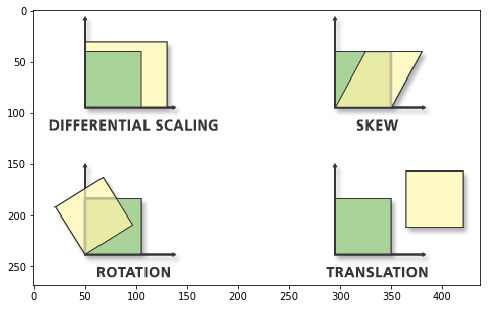

In [17]:
#数学において、アフィン空間（あふぃんくうかん、英語: affine space, アファイン空間とも）
#または擬似空間（ぎじくうかん）とは、幾何ベクトルの存在の場であり、
#ユークリッド空間から絶対的な原点・座標と標準的な長さや角度などといった計量の概念を
#取り除いたアフィン構造を抽象化した幾何学的構造である。

#因みにshapeはカタチづけるとか方向づける
#Affin空間
#こればかりはイメージで入ったほうが早い。
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod030.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

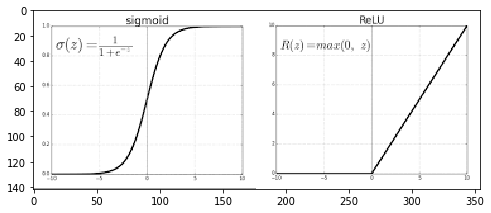

In [18]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod038.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [19]:
#Relu一般的にはこれはランプ関数と呼ばれるが、
#ニューラルネットワークの世界ではReLU 
#(英: Rectified Linear Unit, Rectifier、正規化線形関数）と呼ばれる。

In [20]:
#ソフトマックス関数

#n 次元実数ベクトル x=(x1,⋯,xn) を受け取って n 次元実数ベクトル y=(y1⋯,yn)
#（ただし，yi = e^xi / e^x1+e^x2+⋯+e^xn）
#を返す関数をソフトマックス関数と言う。

#ニューラルネットワークなどに応用がある重要な関数「ソフトマックス関数」についてです。

#ソフトマックス関数の性質
#(i) 0<yi<1
#(ii) y1+⋯+yn=1
#(iii) x の各成分の中で xi がダントツで大きい → yi はほぼ 1 で y の他の成分はほぼ 0

#(i), (ii)はソフトマックス関数の定義から簡単に確認できます。
#出力の各成分は 0 以上 1 以下で，成分の和が 1 であるという性質です。
#確率分布の表現に使えそうですね！
#(iii)については具体例を見るとわかりやすいです。
#例えば，x=(10,2,1) とすると，y=(0.9995⋯,0.0003⋯,0.0001⋯) となります。
#マックス関数（一番大きい成分を 1 にして，それ以外のものは 0 にする関数をこう呼ぶことにする）
#をソフトにしたという感じです。

#シグモイド関数との関係
#n=2 の場合は，
#y1 = e^x1 / e^x1+e^x2 となります（y1+y2=1 という条件があるので，
#y2 のことは忘れて y1 だけ考えてみる）。
#分母分子を e^x1 で割ると 1 / 1+e^x2−x1 となり，シグモイド関数が登場します。

#ソフトマックス関数の微分
#∂yi / ∂xj = {yi(1−yi)  i = j}
#              {−yiyj     i ≠ j}

#証明
#表記簡略化のために，e^x1+⋯+e^xn = Z とおく。yi = e^xi / Z である。

#i=j のとき，
#∂yi / ∂xi = e^xiZ − e^xie^xi / Z^2 = yi(1−yi)
#i≠j のとき，
#∂yi / ∂xj = −e^xi - e^xj / Z^2 = −yiyj

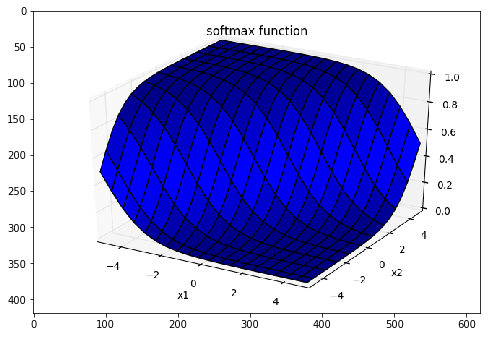

In [21]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod039.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#これはx1,x2x1,x2の値がともに[−5,5][−5,5]である状況でi=2i=2に関するsoftmax関数
#y2 = e^x2 / e^x1+e^x2
#の挙動をプロットしたものになります。
#このグラフを観察するとわかることが2点あります。これから個別に見ていきます。

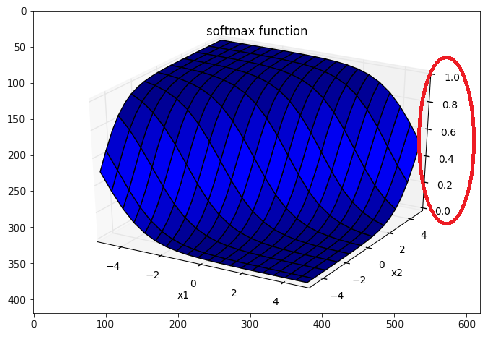

In [22]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod040.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#値域（関数の取りうる値）が0から1の間である
#これがよくsoftmax関数の利点として挙げられていることです。
#もちろん数学的に示すことも可能です。この点ではsigmoid関数と親戚関係であることが言えます。
#（実際、sigmoid関数の多クラスへの拡張という表現がされています。）
#この特徴のおかげで真偽の判断を確率的なあいまい性を残した状態で扱いたいときに
#大変有効になります。

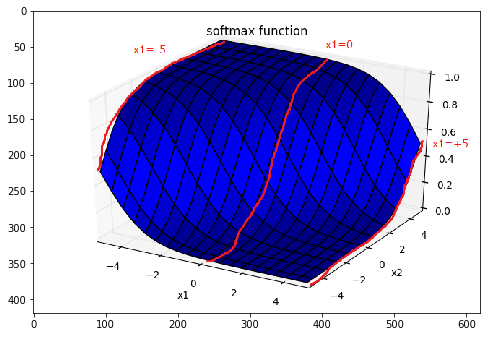

In [23]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod041.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [24]:
#これも重要な性質ですが、x1に比べて相対的にx2の値が大きいときに大きな値をとるように
#なっています。
#x1 = −5のとき、すなわち他の値がx2に対して小さいときは、y2は大きな値を取りやすくなっています。反対に、x1=+5x1=+5のとき、すなわち、他の値がx2x2に対して大きいときは、y2y2は大きな値が取りにくくなっています。
#言い換えれば、「自身xjが他の要素xk(≠j)よりも目立っている確率」
#のような感覚でとらえることができます。

#この現象を比較しやすいよう、それぞれのx1x1の値ごとにプロットしてみます。

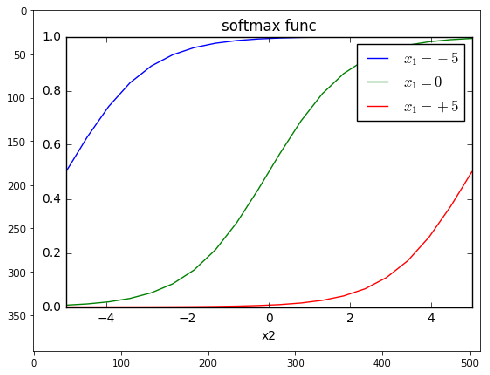

In [25]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod042.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [26]:
#softmax関数の考察より。

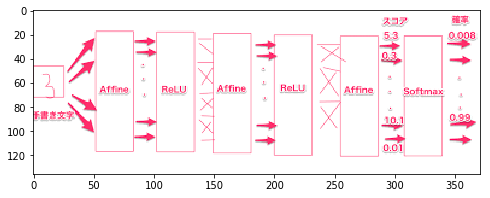

In [27]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

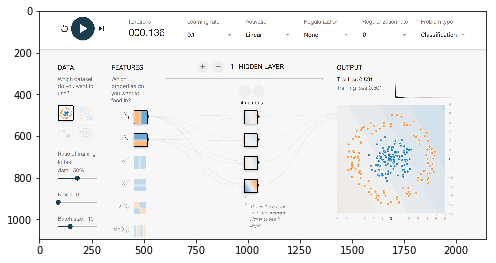

In [28]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod043.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#google play groundで見ると面白い
#中間層からの振る舞いを見ると面白い
#確かにReLUは折れ線を組み合わせている感じ．
#多分各層の数の積の多角形が作れる

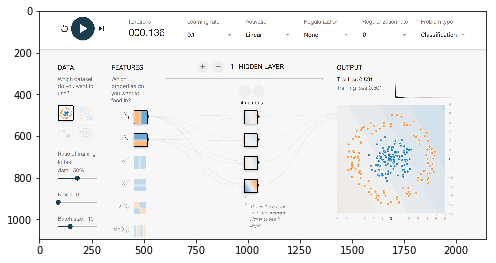

In [29]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod044.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#Liner関数の動き

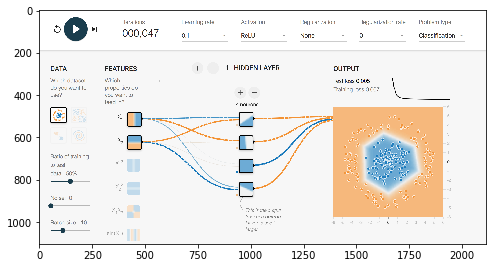

In [30]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod045.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#Relu関数の動き

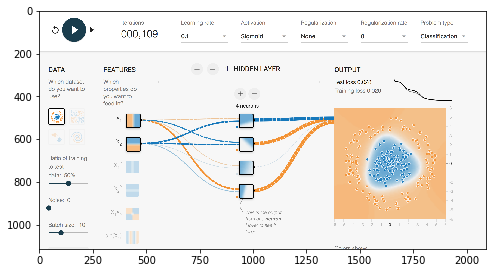

In [31]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod046.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

#sigmoid関数の動き

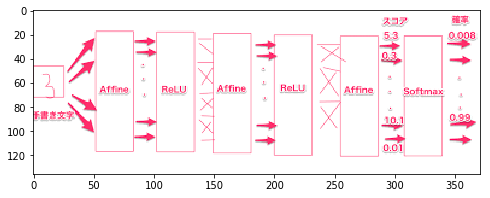

In [32]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [ ]:
#この章のボク的な纏め
#ビッグデータの中から画像を抽出
#その画像をx,y,z軸で抽象的にとらえる(Affine)
#それをニューラルネットワーク、活性化関数で分岐させる(Relu,sigmoid)
#Affine→Relu→Affineは入力層→中間層→出力層の意味になる。
#これを繰り返してその画像及び文字は車なの？、数字の5なの？とかを何回も繰り返して、
#勾配。つまり平均に近づかせていく。
#スコアは様々な数字で出るのでそれをまるめて1-0の間で表記する(softmax)

#そして、上記の矢印は右だけだけれど、学習データが正しいものかも確認しないといけない
#行ったり来たりしないといけないから誤差逆伝播法で始まりと終わりを計算して差異がないか
#数値微分で確認。で、ビッグデータだから全データ確認するのも大変だし、偏微分を使う

#結果として、データが何者なのか？を確認するのが